# Project 2 - Regression and Classification
## Ruixuan Pan

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load 2 datasets
data1=pd.read_csv("framingham.csv")
data2=pd.read_csv("CarPrice_Assignment.csv")

## Part 1 Classification

### Below is the overview of the data gathered by WHO, the objective is to predict the chance of a patient getting heart related diseases, such as Stroke, diabetes, etc., with a classification model

### Attributes of data:
Demographic:
• Male : 1 if male, 0 otherwise

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral:

• CurrentSmoker: whether or not the patient is a current smoker (Nominal)

• CigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical(history):

• BPMeds: whether or not the patient was on blood pressure medication (Nominal)

• PrevalentStroke: whether or not the patient had previously had a stroke (Nominal)

• PrevalentHyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)

• TotChol: total cholesterol level (Continuous)

• SysBP: systolic blood pressure (Continuous)

• DiaBP: diastolic blood pressure (Continuous)

• BMI:Body Mass Index (Continuous)

• HeartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)

• 10 year risk of coronary heart disease CHD (TenYearCHD) : 1 if yes, otherwise 0

In [4]:
data1.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Data Preprocessing

In [3]:
data1.shape

(4238, 16)

In [8]:
data1.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
data1.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
# drop all null value
data1_cleaned=data1.dropna()
data1_cleaned

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [6]:
data1_cleaned.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

## Create Training Set and Testing Set

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression

In [146]:
y = data1_cleaned["TenYearCHD"]
x_data = data1_cleaned.drop(["TenYearCHD"], axis=1)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=30)

## Using Logistic Regression

In [150]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [152]:
model = LogisticRegression()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

In [154]:
print(f"Accuracy: {accuracy}")
print(f"Logistic Regression Classification Report :\n{classification_report(y_test,y_pred)}")

Accuracy: 0.8729508196721312
Logistic Regression Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       631
           1       0.75      0.12      0.21       101

    accuracy                           0.87       732
   macro avg       0.81      0.56      0.57       732
weighted avg       0.86      0.87      0.83       732



Text(95.72222222222221, 0.5, 'truth')

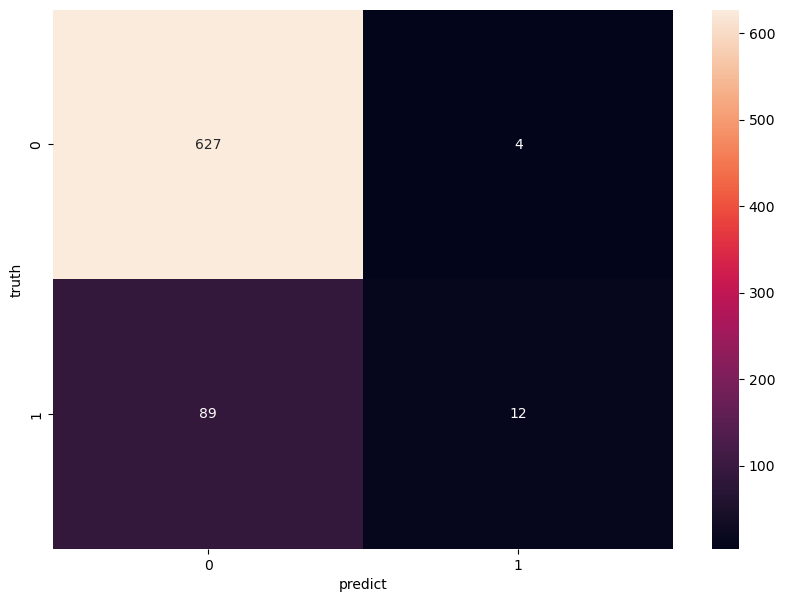

In [156]:
cm = confusion_matrix(y_test, y_pred) # Confusion matrix 
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='.3g')
plt.xlabel('predict')
plt.ylabel('truth')

## Using Support Vector Machine

In [158]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [160]:
#Build the model
svm = SVC(probability=True)
# Trained the model
svm.fit(X_train, y_train)

SVC(probability=True)

In [161]:
y_pred = svm.predict(X_test)

In [164]:
print('Test Score is : ' , svm.score(X_test, y_test))

Test Score is :  0.8592896174863388


In [166]:
print(f"SVM Classification Report :\n{classification_report(y_test,y_pred)}")

SVM Classification Report :
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       631
           1       0.00      0.00      0.00       101

    accuracy                           0.86       732
   macro avg       0.43      0.50      0.46       732
weighted avg       0.74      0.86      0.80       732



Text(95.72222222222221, 0.5, 'truth')

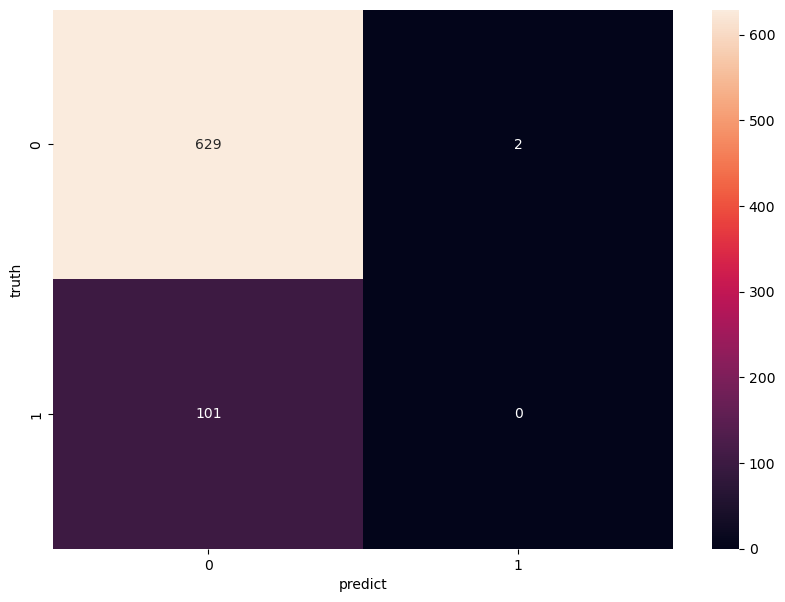

In [168]:
cm = confusion_matrix(y_test, y_pred) # Confusion matrix 
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='.3g')
plt.xlabel('predict')
plt.ylabel('truth')

## Using KKN

In [170]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # build the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [172]:
y_pred = knn.predict(X_test)

In [174]:
print('Test Score is : ' , knn.score(X_test, y_test))

Test Score is :  0.8442622950819673


In [176]:
print(f"KKN Classification Report :\n{classification_report(y_test,y_pred)}")

KKN Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       631
           1       0.24      0.06      0.10       101

    accuracy                           0.84       732
   macro avg       0.55      0.51      0.51       732
weighted avg       0.78      0.84      0.80       732



Text(95.72222222222221, 0.5, 'truth')

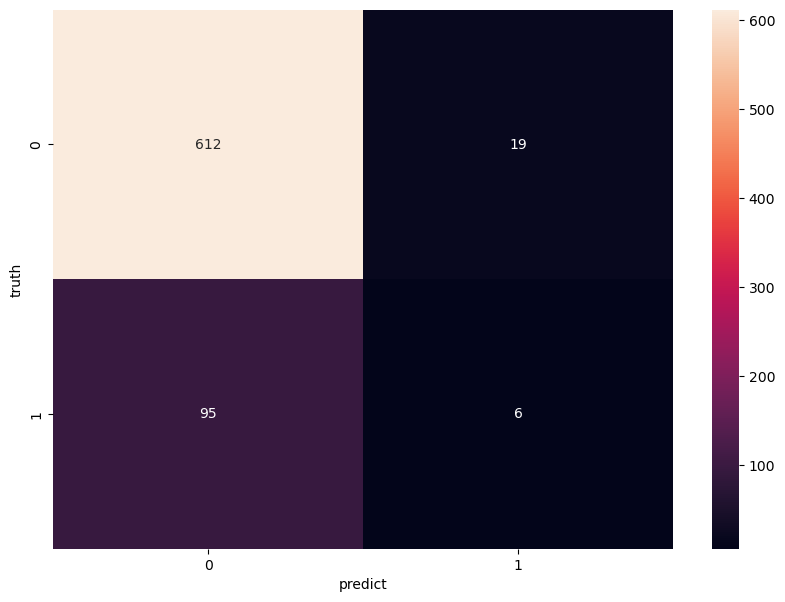

In [178]:
cm = confusion_matrix(y_test, y_pred) # Confusion matrix 
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='.3g')
plt.xlabel('predict')
plt.ylabel('truth')

## Part 2

### Below is the overview of the sample data related to price of car, the objective is to study the factors which impact how car is priced and determine the price of a new car with a regression model 

In [42]:
data2.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Below is a description of attributes in this dataset

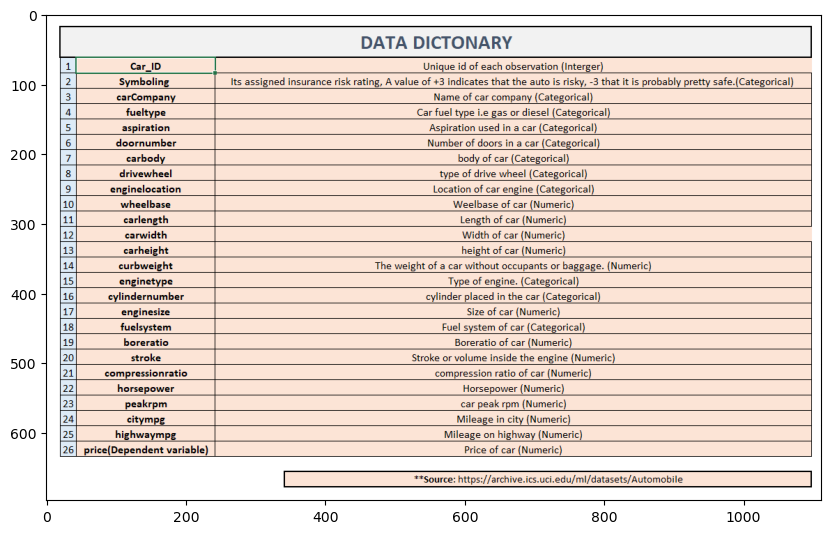

In [71]:
from skimage.io import imread
example_file = ("Project 2.png")
image = imread(example_file)
plt.figure(figsize=(10,7))
plt.imshow(image)
plt.show()

In [74]:
data2=data2.set_index("car_ID")

In [52]:
data2.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [54]:
data2.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [76]:
data2['CompanyName'] = data2['CarName'].apply(lambda x: x.split(" ")[0])

In [78]:
data2.drop(columns='CarName', inplace=True)
data2.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [80]:
data2['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [82]:
def replace(a,b):
    data2['CompanyName'].replace(a,b,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

data2['CompanyName'].unique()

C:\Users\richa\AppData\Local\Temp\ipykernel_30472\2918052844.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['CompanyName'].replace(a,b,inplace=True)


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [84]:
data2['doornumber'] = data2['doornumber'].replace({'four': 4, 'two': 2}).astype('int64')

data2['cylindernumber'] = data2['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}
                                                       ).astype('int64')

C:\Users\richa\AppData\Local\Temp\ipykernel_30472\1873451607.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2['doornumber'] = data2['doornumber'].replace({'four': 4, 'two': 2}).astype('int64')
C:\Users\richa\AppData\Local\Temp\ipykernel_30472\1873451607.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2['cylindernumber'] = data2['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}


In [86]:
data2.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber            int64
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber        int64
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
CompanyName          object
dtype: object

## Create training set and testing sets

In [88]:
# select features that are useful for predicting price, create dummy variables for string variables
features = ['fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
        'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price']
training_data = data2[features]
train_data=pd.get_dummies(training_data, columns=['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 
                 'enginetype'], drop_first=True, dtype='int64')

In [90]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   doornumber           205 non-null    int64  
 1   wheelbase            205 non-null    float64
 2   carlength            205 non-null    float64
 3   carwidth             205 non-null    float64
 4   carheight            205 non-null    float64
 5   curbweight           205 non-null    int64  
 6   cylindernumber       205 non-null    int64  
 7   enginesize           205 non-null    int64  
 8   boreratio            205 non-null    float64
 9   stroke               205 non-null    float64
 10  compressionratio     205 non-null    float64
 11  horsepower           205 non-null    int64  
 12  peakrpm              205 non-null    int64  
 13  citympg              205 non-null    int64  
 14  highwaympg           205 non-null    int64  
 15  price                205 non-null    float64


In [119]:
X=train_data.drop('price',axis=1)
y=train_data['price']

In [121]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

## Using Linear Regression

In [123]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [125]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
predicted=reg.predict(X_test)
print("The model score is",round(r2_score(y_test,predicted)*100,2),"%")
mse = mean_squared_error(y_test, predicted)
print("the mean squared error is ",mse )
mae=mean_absolute_error(y_test,reg.predict(X_test),multioutput='uniform_average')
print("the mean absolute error is ",mae )

The model score is 82.16 %
the mean squared error is  14080560.374002235
the mean absolute error is  2370.3614296854234


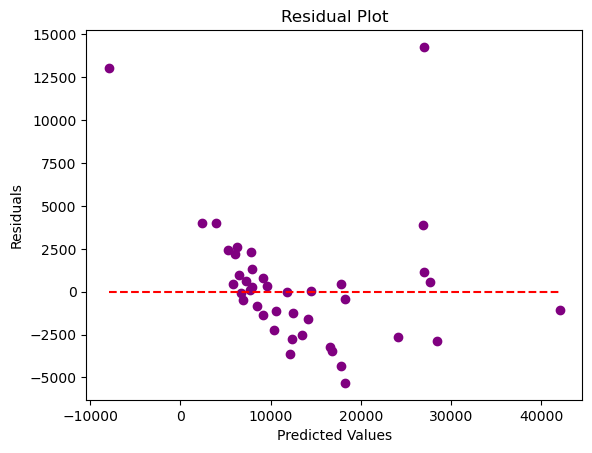

In [127]:
# Calculate residuals (errors)
residuals = y_test - predicted

# Plot residuals
plt.scatter(predicted, residuals, color='purple')

# Add a horizontal line at 0 (perfect fit)
plt.hlines(0, min(predicted), max(predicted), colors='red', linestyles='dashed')

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Show the plot
plt.show()

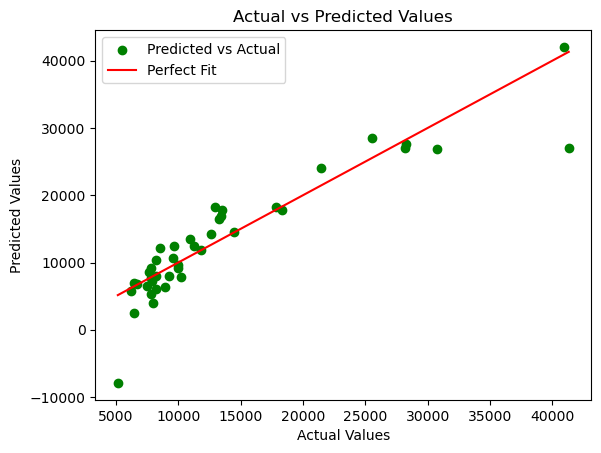

In [129]:
plt.scatter(y_test, predicted, color='green', label='Predicted vs Actual')

# Plot a reference line (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

## Using Decision Tree

In [132]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
tree = DecisionTreeRegressor(random_state=42)

param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': np.arange(1,10),
    
}

grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# using best param
best_model = grid_search.best_estimator_
#fit best param on  train data
best_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=4, random_state=42)

In [134]:
predicted=best_model.predict(X_test)
print("The model score is",round(r2_score(y_test,predicted)*100,2),"%")
mse = mean_squared_error(y_test, predicted)
print("the mean squared error is ",mse )
mae=mean_absolute_error(y_test,reg.predict(X_test),multioutput='uniform_average')
print("the mean absolute error is ",mae )

The model score is 88.42 %
the mean squared error is  9141413.203509487
the mean absolute error is  2370.3614296854234


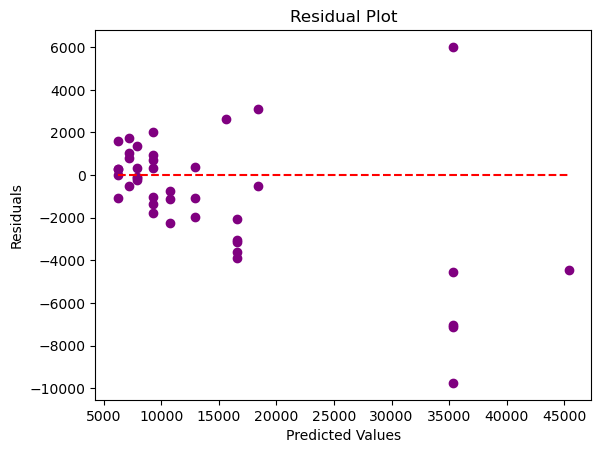

In [136]:
# Calculate residuals (errors)
residuals = y_test - predicted

# Plot residuals
plt.scatter(predicted, residuals, color='purple')

# Add a horizontal line at 0 (perfect fit)
plt.hlines(0, min(predicted), max(predicted), colors='red', linestyles='dashed')

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Show the plot
plt.show()

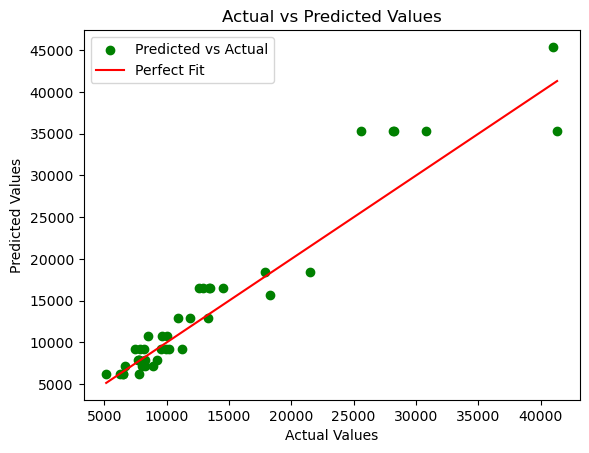

In [138]:
# Scatter plot for actual vs predicted values
plt.scatter(y_test, predicted, color='green', label='Predicted vs Actual')

# Plot a reference line (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

# Full Report

## The datasets loaded are from Kaggle, one for classification and another for regression. 

## For the first dataset, the goal is to observe potential factors for causing heart disease, including smoking habits, medical history, and dietary intakes such that recommendation on how to reduce the risk of getting heart disease can be made from physicians and doctors to patients in different countries. To begin the analysis, a summary of statistics is provided and all missing values are removed, then the data is standardized in order to perform data modelling. Training and testing set is splited 80/20 respectively, selected logistic regression, support vector machine (SVM), and KKN as the model of comparision. After implementation, logistic regression received the highest accuracy score of 88%, followed by SVM(86%) and KKN(84%). Since the confusion matrix for all three models are imbalanced, recall and precision rate are checked. For precision rate, logistic model has the highest score (75%), followed by KNN (24%) and SVM (0%). For recall rate, logistic model also has the highest score (12%), followed by KNN (6%) and SVM (0%). For F1-score, logistic model once again has the highest score (21%), followed by KNN (10%) and SVM (0%). For negative cases, the performance in precision, recall, and F1-socre went much better in all three models, with logistic model (88% precision, 99% recall, 93% F1-score) performing the best, then KKN (87% precision, 97% recall, 91% F1-score) and SVM (86% precision, 100% recall, 92% F1-score) the last. All tested models are not good at assessing the positive cases, therefore other methods for balancing the confusion matrix are recommended.

## For the second dataset, suppose a car manufacturer wants to know how other players in the market manipulate the prices of their cars, especially when demands varies depending on what customers wants for their cars (eg. bigger in sizes, engine with more horsepowers, type of transmission, combustion types, or even gas mileage). Then the company hires a consulting firm to conduct a market research and provide the information neccessary for optimal pricing strategy of the new car projected to be launched by the end of the year. To analyze the data, first set the car index column as the index of the car, check for missing values, and provide summary of statistics, Replace the car name with the carmaker name, then check for any misspelled name and replace with the correct name, convert door number and cylinder number to numeric type. For regression modelling, all attributes are selected except for symboling and company name, dummy variables for categorical attributes are created, and price is the target variable. The dataset is splitted into training data (80%) and testing data (20%), using the linear regression and decision tree for training. The results from the linear regression model has R_square of 82% explaining the variation of the prices by the explanatory variables defined in the model, while decision tree has R_square of 88%. While both model has the same MAE of 2370, the MSE is larger in linear regression (14080560) than decision tree (9141413), as evident in the residual plot where outliers are even more spread out away from line of best fit in the linear regression model. After the comparision, the car manufacturer decides to use decision tree as model of prediction, as it provides better precision and the logic apply in decision tree makes more sense in interpreting rules behind the price setting.

# Reflection

## During the generation of the report, the biggest challenge faced to think of alternative regression or classification models other than what most people tend to create when encounter the data, in this case the logistic regression in the first problem and multivariate linear regression in the second problem. Another issues would be to illustrate the evaluation results in a comprehensive way, in other words what information is hidden behind the confusion matrix or the residual plot.

## By doing this project, ML modelling is essential for making prediction and identify an object as either one of the two groups. The process of data training allows the computer algorithm to learn by itself, memorizing the observations and patterns, and make its decision about the new data based on what it learned during the training. This will accelerates the process of better business decision-making and establish strategies to achieve goals, ML helps physicians to assess patient's health condition and habits to determine the health status of heart, and inform the carmakers about the major factors for price of the car. This helps stakeholders to capture the details influencing the success of their businesses with high efficiency.

# References for dataset
### https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression/data
### https://www.kaggle.com/datasets/hellbuoy/car-price-prediction